**Google Play Data Analysis**

In [ ]:
import pandas as pd
import numpy as np

# Ricarica il CSV
df = pd.read_csv('googleplaystore.csv')

# Rimuovi righe anomale e converte numeriche
df = df[df["Rating"] <= 5]
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['Rating', 'Current Ver', 'Android Ver'])

# Converti Reviews, Installs, Price
df["Reviews"] = df["Reviews"].astype(int)
df["Installs"] = df["Installs"].astype(str).str.replace(r"[+,]", "", regex=True).astype(int)
df["Price"] = df["Price"].astype(str).str.replace("$", "", regex=False).astype(float)

# ✅ Funzione per convertire la colonna Size
def convert_size(value):
    if isinstance(value, str):
        value = value.replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif value == "Varies with device":
            return np.nan
    return np.nan

# Applica la conversione
df["Size"] = df["Size"].apply(convert_size)

# Sostituisci i NaN con la mediana della categoria
df["Size"] = df.groupby("Category")["Size"].transform(lambda x: x.fillna(x.median()))

# Controllo finale
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 971.9+ KB
None
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price        

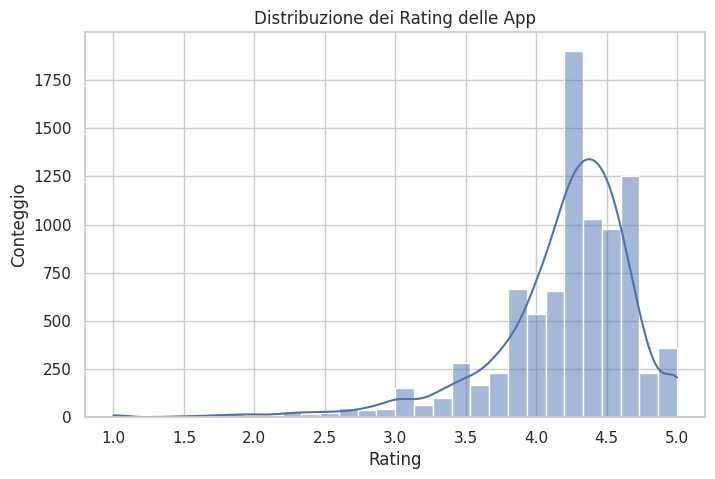

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta stile
sns.set(style="whitegrid")

# Distribuzione dei rating
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=30, kde=True)
plt.title("Distribuzione dei Rating delle App")
plt.xlabel("Rating")
plt.ylabel("Conteggio")
plt.show()


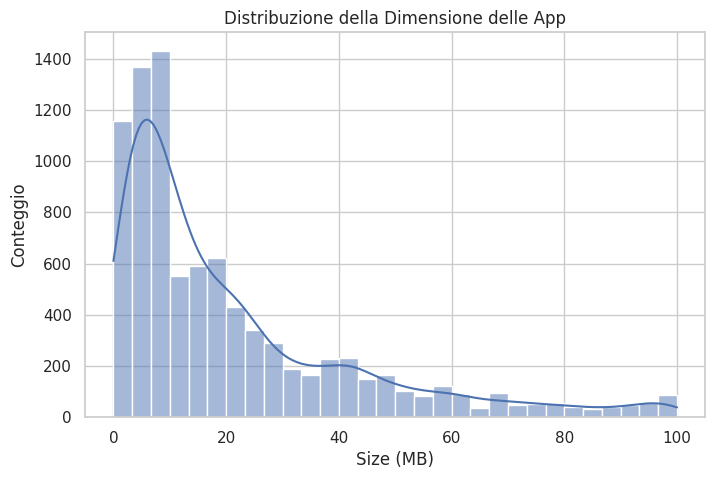

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Size"] / 1_000_000, bins=30, kde=True)  # in MB
plt.title("Distribuzione della Dimensione delle App")
plt.xlabel("Size (MB)")
plt.ylabel("Conteggio")
plt.show()


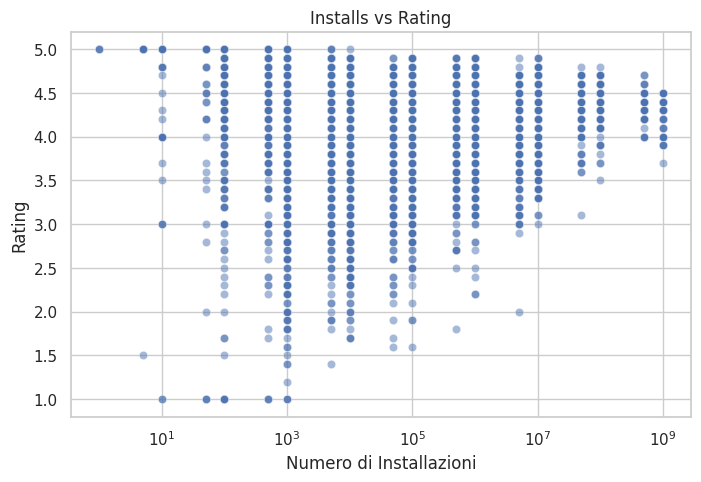

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Installs", y="Rating", alpha=0.5)
plt.title("Installs vs Rating")
plt.xlabel("Numero di Installazioni")
plt.ylabel("Rating")
plt.xscale("log")  # scala log per migliore visualizzazione
plt.show()


In [ ]:
corr = df[["Rating", "Installs"]].corr()
print(corr) #no correlation between Rating and Installs

            Rating  Installs
Rating    1.000000  0.050869
Installs  0.050869  1.000000


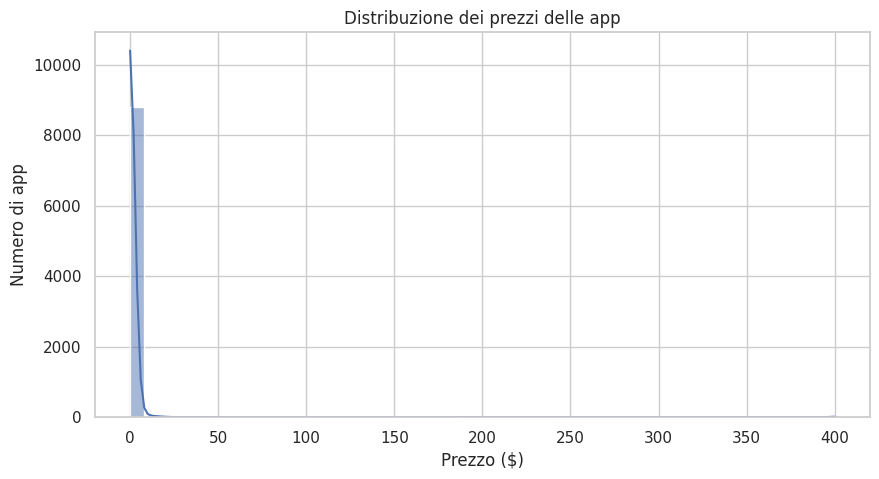

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribuzione dei prezzi delle app')
plt.xlabel('Prezzo ($)')
plt.ylabel('Numero di app')
plt.show()


In [ ]:
df["Price"].value_counts()

,count
Price,
0.00,8275
2.99,110
0.99,104
4.99,68
1.99,59
...,...
2.95,1
2.90,1
1.97,1


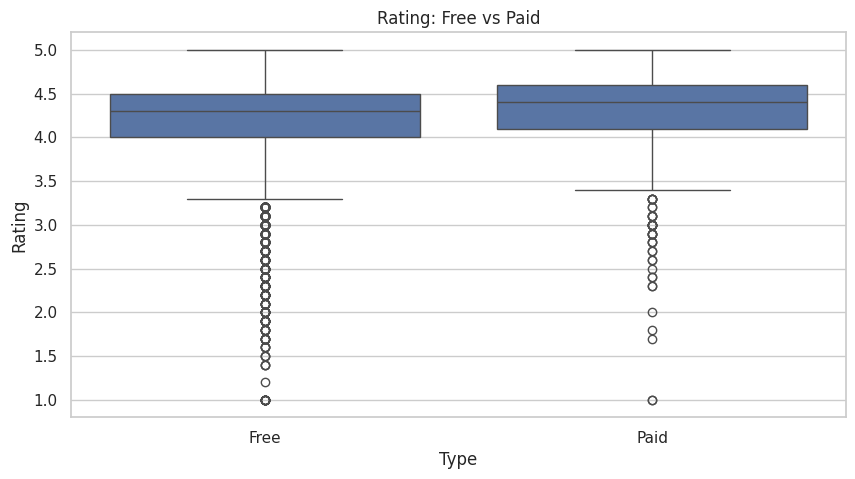

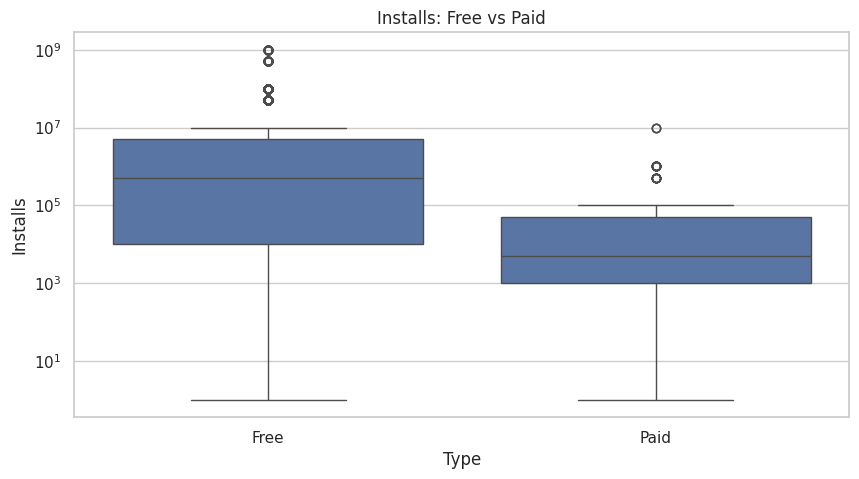

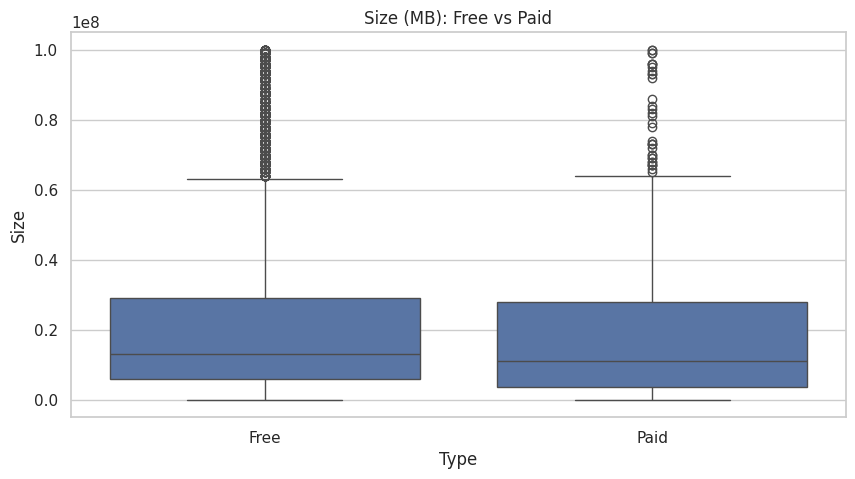

In [ ]:
# Boxplot confronto rating
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Type', y='Rating')
plt.title('Rating: Free vs Paid')
plt.show()

# Boxplot confronto installs
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Type', y='Installs')
plt.title('Installs: Free vs Paid')
plt.yscale('log')  # scala log per valori molto distanti
plt.show()

# Boxplot confronto size
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Type', y='Size')
plt.title('Size (MB): Free vs Paid')
plt.show()


**Analisi per categoria di app**

- quali categorie di app sono più popolari?
- quali categorie hanno più installazioni medie?
- ci sono categorie con rating significativamente diversi?

In [ ]:
category_counts = df["Category"].value_counts()
category_counts.head(10)

,count
Category,
FAMILY,1717
GAME,1074
TOOLS,733
PRODUCTIVITY,334
FINANCE,317
PERSONALIZATION,308
COMMUNICATION,307
LIFESTYLE,305
PHOTOGRAPHY,304


In [ ]:
category_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
category_installs.head(10)


,Installs
Category,
COMMUNICATION,7.867180e+07
SOCIAL,5.128624e+07
VIDEO_PLAYERS,3.888686e+07
PRODUCTIVITY,3.731458e+07
PHOTOGRAPHY,3.197777e+07
TRAVEL_AND_LOCAL,3.103346e+07
GAME,2.937045e+07
NEWS_AND_MAGAZINES,2.520145e+07
ENTERTAINMENT,2.212306e+07


In [ ]:
# Raggruppa per categoria e calcola installazioni medie
installs_by_category = df.groupby("Category")["Installs"].mean().reset_index()

# Esporta in CSV
installs_by_category.to_csv("installs_by_category.csv", index=False)
